In [1]:
# the meaningfulness of '__init__'
#
class A(object):
    i=22
    # self is defined overhere
    def __init__(self):
        self.x = 'Hello'
    #self is defined by __init__, so only 'foo' needs to be defined in method_a 
    def method_a(self, foo):
        print (self.x + ' ' + foo)

In [2]:
a=A()
a.i

22

In [3]:
a.method_a('Sailor!')

Hello Sailor!


# Draft 

In [4]:
import numpy as np
import MixtureOptDesign

In [5]:
#input
    #design 
    #beta 
    #order
    #q=3  j=2 s=8

# Data
data = [0.3897873, 0.6292498, 0.7009263, 0.4262842, 0.246073770, 0.48413014, 0.2913878, 0.7201046335,
        0.4982357, 0.007519965, 0.2505569, 0.1549670, 0.5415304, 0.3639989, 0.04235179, 0.3279013,
        0.2375383, 0.1180457, 0.2000333, 0.2569634, 0.749005428, 0.03588967, 0.3591402, 0.0009022414,
        0.2549352, 0.636080256, 0.4460236, 0.6877322, 0.2635403, 0.3727396, 0.44510098, 0.2701244,
        0.3726744, 0.2527044, 0.0990404, 0.3167524, 0.004920801, 0.47998018, 0.3494720, 0.2789931250,
        0.2468291, 0.356399779, 0.3034196, 0.1573008, 0.1949293, 0.2632615, 0.51254723, 0.4019743]

# Convert to a numpy array of shape (3, 2, 8)
design = np.array(data).reshape((3, 2, 8))

In [6]:
design

array([[[0.3897873 , 0.6292498 , 0.7009263 , 0.4262842 , 0.24607377,
         0.48413014, 0.2913878 , 0.72010463],
        [0.4982357 , 0.00751996, 0.2505569 , 0.154967  , 0.5415304 ,
         0.3639989 , 0.04235179, 0.3279013 ]],

       [[0.2375383 , 0.1180457 , 0.2000333 , 0.2569634 , 0.74900543,
         0.03588967, 0.3591402 , 0.00090224],
        [0.2549352 , 0.63608026, 0.4460236 , 0.6877322 , 0.2635403 ,
         0.3727396 , 0.44510098, 0.2701244 ]],

       [[0.3726744 , 0.2527044 , 0.0990404 , 0.3167524 , 0.0049208 ,
         0.47998018, 0.349472  , 0.27899313],
        [0.2468291 , 0.35639978, 0.3034196 , 0.1573008 , 0.1949293 ,
         0.2632615 , 0.51254723, 0.4019743 ]]])

In [7]:
# array to dataframe
import numpy as np
import pandas as pd

def arrary_to_dataframe(arr):
    """
    Takes a numpy array as input and returns three lists.
    """
    list1, list2, list3 = [], [], []
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            for k in range(arr.shape[2]):
                if i == 0:
                    list1.append(arr[i,j,k])
                elif i == 1:
                    list2.append(arr[i,j,k])
                else:
                    list3.append(arr[i,j,k])

    # create a dataframe with the three lists as columns
    df = pd.DataFrame({'ingredient_x1': list1, 'ingredient_x2': list2, 'ingredient_x3': list3})
    return df


In [8]:
print(design)

[[[0.3897873  0.6292498  0.7009263  0.4262842  0.24607377 0.48413014
   0.2913878  0.72010463]
  [0.4982357  0.00751996 0.2505569  0.154967   0.5415304  0.3639989
   0.04235179 0.3279013 ]]

 [[0.2375383  0.1180457  0.2000333  0.2569634  0.74900543 0.03588967
   0.3591402  0.00090224]
  [0.2549352  0.63608026 0.4460236  0.6877322  0.2635403  0.3727396
   0.44510098 0.2701244 ]]

 [[0.3726744  0.2527044  0.0990404  0.3167524  0.0049208  0.47998018
   0.349472   0.27899313]
  [0.2468291  0.35639978 0.3034196  0.1573008  0.1949293  0.2632615
   0.51254723 0.4019743 ]]]


In [9]:
df_design=arrary_to_dataframe(design)

In [10]:
df_design

,ingredient_x1,ingredient_x2,ingredient_x3
0,0.389787,0.237538,0.372674
1,0.629250,0.118046,0.252704
2,0.700926,0.200033,0.099040
3,0.426284,0.256963,0.316752
4,0.246074,0.749005,0.004921
5,0.484130,0.035890,0.479980
6,0.291388,0.359140,0.349472
7,0.720105,0.000902,0.278993
8,0.498236,0.254935,0.246829
9,0.007520,0.636080,0.356400


In [11]:
beta = MixtureOptDesign.generate_beta_params(num_params=7,q=3)
beta_star, beta_2, beta_3 = MixtureOptDesign.get_beta_coefficients(beta,3,3)

In [12]:
print('beta:'+' '+str(beta))
print()
print('beta_star:'+' '+str(beta_star)+ ' '+ str(len(beta_star)))
print()
print('beta_2:'+' '+str(beta_2)+ ' '+ str(len(beta_2)))
print()
print('beta_3:'+' '+str(beta_3)+ ' '+ str(len(beta_3)))

beta: [ 0.72814891  2.1431709   0.36071225 -0.43609029  0.14421209 -1.3218758 ]

beta_star: [0.72814891 2.1431709 ] 2

beta_2: [ 0.36071225 -0.43609029  0.14421209] 3

beta_3: [-1.3218758] 1


In [13]:
MixtureOptDesign.get_i_optimality_mnl(design,3,beta)

539.9435891517597

In [14]:
#MixtureOptDesign.get_i_optimality_mnl(optimal_design,3,beta)

In [15]:
#utility and choice_probability
U = MixtureOptDesign.get_utilities(design,beta_star,beta_2,beta_3,3)
P = MixtureOptDesign.get_choice_probabilities(U)

In [16]:
U

array([[0.73011243, 0.648118  , 0.94388688, 0.80761631, 1.84971266,
        0.32582853, 0.94496928, 0.43869572],
       [0.86897795, 1.3997002 , 1.1201992 , 1.60802001, 0.93520669,
        1.03797702, 1.00222724, 0.76074759]])

In [17]:
P

array([[0.4653393 , 0.32047664, 0.45603575, 0.30993917, 0.71392134,
        0.32912428, 0.48568942, 0.42017577],
       [0.5346607 , 0.67952336, 0.54396425, 0.69006083, 0.28607866,
        0.67087572, 0.51431058, 0.57982423]])

In [18]:
#Append U and P to df_design
df_design['Utility_U'] = U.flatten()
df_design['Choice_pobability_P'] = P.flatten()
df_design

,ingredient_x1,ingredient_x2,ingredient_x3,Utility_U,Choice_pobability_P
0,0.389787,0.237538,0.372674,0.730112,0.465339
1,0.629250,0.118046,0.252704,0.648118,0.320477
2,0.700926,0.200033,0.099040,0.943887,0.456036
3,0.426284,0.256963,0.316752,0.807616,0.309939
4,0.246074,0.749005,0.004921,1.849713,0.713921
5,0.484130,0.035890,0.479980,0.325829,0.329124
6,0.291388,0.359140,0.349472,0.944969,0.485689
7,0.720105,0.000902,0.278993,0.438696,0.420176
8,0.498236,0.254935,0.246829,0.868978,0.534661
9,0.007520,0.636080,0.356400,1.399700,0.679523


In [19]:
#Save dataframe as CSV
df_design.to_csv('df_design.csv', index=False)

In [20]:
model_array = MixtureOptDesign.get_model_matrix(design,3)

In [21]:
#optimal design

b = MixtureOptDesign.CoordinateExchangeIOptimal(design,order=3,n_points=100,iteration=10)

In [22]:
b.get_design()
optimal_design=b.optimize_design()

In [23]:
arrary_to_dataframe(optimal_design)

,ingredient_x1,ingredient_x2,ingredient_x3
0,0.000000,0.000000,1.000000
1,0.000000,1.000000,0.000000
2,0.666667,0.333333,0.000000
3,0.000000,0.000000,1.000000
4,1.000000,0.000000,0.000000
5,0.000000,0.000000,1.000000
6,0.616162,0.383838,0.000000
7,0.000000,0.000000,1.000000
8,0.575758,0.000000,0.424242
9,0.076988,0.104830,0.818182


In [24]:
plot = MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design)

In [25]:
MixtureOptDesign.MNLVis.plot_ternary_design(design)

In [26]:
plot

# VNS

In [27]:
import numpy as np

#Simplex-lattice design

def create_simplex_lattice(q, h):
    design = []
    for i in range(h):
        for j in range(h - i):
            k = (h - 1) - i - j
            point = np.array([i, j, k]) / (h - 1)
            design.append(point)
    return np.array(design)

q = 3  # Number of components
h = 4  # Number of levels

lattice_design_array = create_simplex_lattice(q, h)

print("Simplex-lattice design array:")
print(lattice_design_array)

Simplex-lattice design array:
[[0.         0.         1.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.         1.         0.        ]
 [0.33333333 0.         0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.66666667 0.         0.33333333]
 [0.66666667 0.33333333 0.        ]
 [1.         0.         0.        ]]


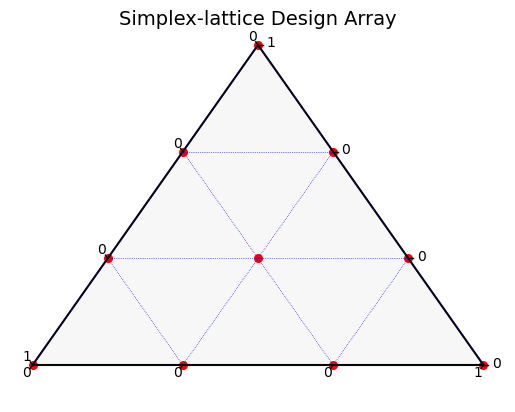

In [28]:
import ternary
import pandas as pd
import matplotlib.pyplot as plt

# Plot the simplex-lattice design array
def plot_simplex_lattice(design_array):
    figure, tax = ternary.figure(scale=1)
    tax.set_title("Simplex-lattice Design Array", fontsize=14)

    # Plot the points
    for point in design_array:
        tax.scatter([point], marker='o', color='red', s=30)

    tax.boundary()
    tax.gridlines(multiple=1/3, color="blue")
    tax.ticks(axis='lbr', linewidth=1, multiple=1/3)
    tax.get_axes().axis('off')

    plt.show()

plot_simplex_lattice(lattice_design_array)

In [29]:
#lattice_design_array to dataframe

point0=lattice_design_array[0]
#point0 to list
list_points=[]
for i in range(lattice_design_array.shape[0]):
    point0=lattice_design_array[i]
    point0_list=point0.tolist()
    list_points.append(point0_list)

In [30]:
#Lattice design dataframe 
df_lattice_design = pd.DataFrame(list_points, columns=['ingredient_x1', 'ingredient_x2', 'ingredient_x3'])
#give rows name to df_lattice_design: point0, point1, point2, point3...
df_lattice_design.index = ['point'+str(i) for i in range(df_lattice_design.shape[0])]
df_lattice_design

,ingredient_x1,ingredient_x2,ingredient_x3
point0,0.000000,0.000000,1.000000
point1,0.000000,0.333333,0.666667
point2,0.000000,0.666667,0.333333
point3,0.000000,1.000000,0.000000
point4,0.333333,0.000000,0.666667
point5,0.333333,0.333333,0.333333
point6,0.333333,0.666667,0.000000
point7,0.666667,0.000000,0.333333
point8,0.666667,0.333333,0.000000
point9,1.000000,0.000000,0.000000


In [31]:
#In the sample choice experimen with mixtures, q=3, j=2, s=4, k=3
 #picks 3 random points from df_lattice_design (k =3)
df_lattice_design_sample=df_lattice_design.sample(3)
df_lattice_design_sample
 #makes rows name as a new column
df_lattice_design_sample['point_name']=df_lattice_design_sample.index   
df_lattice_design_sample

,ingredient_x1,ingredient_x2,ingredient_x3,point_name
point2,0.0,0.666667,0.333333,point2
point3,0.0,1.000000,0.000000,point3
point9,1.0,0.000000,0.000000,point9


In [32]:
#create dataframe with j*s (j=2, s=4)rows with points from df_lattice_design_sample 
df_lattice_design_sample_j_s=df_lattice_design_sample.copy()
for i in range(1,8):
    df_lattice_design_sample_j_s=df_lattice_design_sample_j_s.append(df_lattice_design_sample)

#reset index
df_lattice_design_sample_j_s.reset_index(drop=True, inplace=True)
df_lattice_design_sample_j_s




C:\Users\s8533\AppData\Local\Temp\ipykernel_10264\3081788439.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\s8533\AppData\Local\Temp\ipykernel_10264\3081788439.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\s8533\AppData\Local\Temp\ipykernel_10264\3081788439.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\s8533\AppData\Local\Temp\ipykernel_10264\3081788439.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\s8533\AppData\Local\Temp\ipykernel_10264\3081788439.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,ingredient_x1,ingredient_x2,ingredient_x3,point_name
0,0.0,0.666667,0.333333,point2
1,0.0,1.000000,0.000000,point3
2,1.0,0.000000,0.000000,point9
3,0.0,0.666667,0.333333,point2
4,0.0,1.000000,0.000000,point3
5,1.0,0.000000,0.000000,point9
6,0.0,0.666667,0.333333,point2
7,0.0,1.000000,0.000000,point3
8,1.0,0.000000,0.000000,point9
9,0.0,0.666667,0.333333,point2


In [33]:
lattice_design_array

array([[0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.33333333, 0.        , 0.66666667],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.66666667, 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ]])

In [34]:
import random
#k=4
#picks 4 random points from lattice_design_array
random_indices = random.sample(range(len(lattice_design_array)), 4)
# Create a new array with the selected points
selected_points = lattice_design_array[random_indices]
print(selected_points)

[[0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]


In [35]:
#unselected_points
unselected_points = np.delete(lattice_design_array, random_indices, axis=0)
print(unselected_points)

[[0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.33333333 0.         0.66666667]
 [0.33333333 0.66666667 0.        ]
 [0.66666667 0.         0.33333333]
 [1.         0.         0.        ]]


In [36]:
# Enumerate the array to add index numbers
indexed_array = np.array(list(enumerate(lattice_design_array)), dtype=object)
print(indexed_array)


[[0 array([0., 0., 1.])]
 [1 array([0.        , 0.33333333, 0.66666667])]
 [2 array([0.        , 0.66666667, 0.33333333])]
 [3 array([0., 1., 0.])]
 [4 array([0.33333333, 0.        , 0.66666667])]
 [5 array([0.33333333, 0.33333333, 0.33333333])]
 [6 array([0.33333333, 0.66666667, 0.        ])]
 [7 array([0.66666667, 0.        , 0.33333333])]
 [8 array([0.66666667, 0.33333333, 0.        ])]
 [9 array([1., 0., 0.])]]


In [37]:
print(selected_points)
#select the first list in selected_points

#build a loop to add every list in selected_points into selected_points
#repeat the loop for 3 times
initial_design_points_VNS=selected_points
for j in range(0,3):
    for i in range(0,4):
        array_in_selected_points=initial_design_points_VNS[i]
        initial_design_points_VNS=np.append(initial_design_points_VNS, [array_in_selected_points], axis=0)
print(initial_design_points_VNS)


[[0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]
[[0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]


In [38]:
#Save unmodied initial_design_points_VNS
initial_design_points_VNS_copy=initial_design_points_VNS.copy()
initial_design_points_VNS_copy2=initial_design_points_VNS.copy()


In [39]:
#Build a function to modify the initial design to avoid singular matrix
# and unify the format to Geoffrey initial design
def modify_initial_design(initial_design_points_VNS):
    #Save unmodied initial_design_points_VNS
    initial_design_points_VNS_copy=initial_design_points_VNS.copy()
    #modiy the initial_design_points_VNS for a little bit to avoid singular matrix
    initial_design_points_VNS_modified=initial_design_points_VNS.copy()
    for i in range(16):
        if initial_design_points_VNS_modified[i][0] == 1 :
            initial_design_points_VNS_modified[i][0] = initial_design_points_VNS_modified[i][0]-0.001*i
            initial_design_points_VNS_modified[i][2] = initial_design_points_VNS_modified[i][2]+0.001*i
        elif initial_design_points_VNS_modified[i][1] ==1 :
            initial_design_points_VNS_modified[i][1] = initial_design_points_VNS_modified[i][1] -0.001*i
            initial_design_points_VNS_modified[i][2] = initial_design_points_VNS_modified[i][2] +0.001*i
        elif initial_design_points_VNS_modified[i][2] ==1 :
            initial_design_points_VNS_modified[i][0] = initial_design_points_VNS_modified[i][0]+ 0.001*i
            initial_design_points_VNS_modified[i][2] = initial_design_points_VNS_modified[i][2]- 0.001*i 
        else :
            initial_design_points_VNS_modified[i][0] = initial_design_points_VNS_modified[i][0]+ 0.001*i
            initial_design_points_VNS_modified[i][1] = initial_design_points_VNS_modified[i][1]- 0.001*i
    #build a loop to pick first element in the list in intial_design_points_VNS, and add it to a new list
    list_containing_first_element_in_list=[]
    for i in range(0,16):
        first_element_in_list=initial_design_points_VNS_modified[i][0]
        list_containing_first_element_in_list.append(first_element_in_list)
        #make the first half of the list into a new array, second half of the list into another array
    array_containing_first_half_of_list_containing_first_element_in_list=np.array(list_containing_first_element_in_list[0:8])
    array_containing_second_half_of_list_containing_first_element_in_list=np.array(list_containing_first_element_in_list[8:16])
        #put the two arrays into a new array as the two elements repectively
    array_containing_two_arrays_1=np.array([array_containing_first_half_of_list_containing_first_element_in_list, array_containing_second_half_of_list_containing_first_element_in_list])
    #build a loop to pick second element in the list in intial_design_points_VNS, and add it to a new list
    list_containing_second_element_in_list=[]
    for i in range(0,16):
        second_element_in_list=initial_design_points_VNS_modified[i][1]
        list_containing_second_element_in_list.append(second_element_in_list)
        #make the first half of the list into a new array, second half of the list into another array
    array_containing_first_half_of_list_containing_second_element_in_list=np.array(list_containing_second_element_in_list[0:8])
    array_containing_second_half_of_list_containing_second_element_in_list=np.array(list_containing_second_element_in_list[8:16])

        #put the two arrays into a new array as the two elements repectively
    array_containing_two_arrays_2=np.array([array_containing_first_half_of_list_containing_second_element_in_list, array_containing_second_half_of_list_containing_second_element_in_list])
    #build a loop to pick third element in the list in intial_design_points_VNS, and add it to a new list
    list_containing_third_element_in_list=[]
    for i in range(0,16):
        third_element_in_list=initial_design_points_VNS_modified[i][2]
        list_containing_third_element_in_list.append(third_element_in_list)
        #make the first half of the list into a new array, second half of the list into another array
    array_containing_first_half_of_list_containing_third_element_in_list=np.array(list_containing_third_element_in_list[0:8])
    array_containing_second_half_of_list_containing_third_element_in_list=np.array(list_containing_third_element_in_list[8:16])

        #put the two arrays into a new array as the two elements repectively
    array_containing_two_arrays_3=np.array([array_containing_first_half_of_list_containing_third_element_in_list, array_containing_second_half_of_list_containing_third_element_in_list])
    #put the three arrays into a new array as the three elements repectively
    design_VNS=np.array([array_containing_two_arrays_1, array_containing_two_arrays_2, array_containing_two_arrays_3])
    return design_VNS
    

In [40]:
modify_initial_design(initial_design_points_VNS_copy)

array([[[0.66666667, 0.001     , 0.002     , 0.33633333, 0.67066667,
         0.005     , 0.006     , 0.34033333],
        [0.67466667, 0.009     , 0.01      , 0.34433333, 0.67866667,
         0.013     , 0.014     , 0.34833333]],

       [[0.33333333, 0.66566667, 0.33133333, 0.33033333, 0.32933333,
         0.66166667, 0.32733333, 0.32633333],
        [0.32533333, 0.65766667, 0.32333333, 0.32233333, 0.32133333,
         0.65366667, 0.31933333, 0.31833333]],

       [[0.        , 0.33333333, 0.66666667, 0.33333333, 0.        ,
         0.33333333, 0.66666667, 0.33333333],
        [0.        , 0.33333333, 0.66666667, 0.33333333, 0.        ,
         0.33333333, 0.66666667, 0.33333333]]])

In [42]:
print('Selelcted points are:')
print(selected_points)
print()
print('initial design points are:')
print(initial_design_points_VNS_copy)
print()
print('unselected points are:') 
print(unselected_points)
print()

Selelcted points are:
[[0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]

initial design points are:
[[0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]

unselected points are:
[[0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.33333333 0.         0.66666667]
 [0.33333333 0.66666667 0.        ]
 [0.66666667 0.         0.33333333]
 [1.         0.         

In [43]:
####N0######

##Replace first point in selected_points with first point in unselected_points
target_point=selected_points[0]
replace_point=unselected_points[0]

mask = np.all(initial_design_points_VNS_copy == target_point, axis=1)
initial_design_points_VNS_copy[mask] = replace_point



In [44]:
#
design_N0=modify_initial_design(initial_design_points_VNS_copy)
#calculate the Bayesian I optimality of the new design
MixtureOptDesign.get_i_optimality_mnl(design_N0,3,beta=beta)


336685712.9792328

In [46]:
#compute the bayesian I optimality of the initial design
design_VNS_initial=modify_initial_design(initial_design_points_VNS)
i_optimality_VNS=MixtureOptDesign.get_i_optimality_mnl(design_VNS_initial,3,beta=beta)

In [47]:
i_optimality_VNS

2434261035823097.5

In [53]:
#compute the bayesian I optimality of the initial design
design_VNS_initial=modify_initial_design(initial_design_points_VNS)
i_optimality_VNS=MixtureOptDesign.get_i_optimality_mnl(design_VNS_initial,3,beta=beta)
#build a loop to replace each point in selected_points with each point in unselected_points
# and find the combination of selected_points and unselected_points that gives the lowest Bayesian I optimality
for i in range(0,4):
    for j in range(0,6):
        target_point=selected_points[i]
        replace_point=unselected_points[j]
       
        #make a copy of initial_design_points_VNS
        initial_design_points_VNS_copy=initial_design_points_VNS.copy()
        #replace the target point with the replace point
        mask = np.all(initial_design_points_VNS_copy == target_point, axis=1)
        initial_design_points_VNS_copy[mask] = replace_point
        #compute the Bayesian I optimality of the new design
        design_N0=modify_initial_design(initial_design_points_VNS_copy)
        i_optimality_N0=MixtureOptDesign.get_i_optimality_mnl(design_N0,3,beta=beta)
        #compare the Bayesian I optimality of the new design with the Bayesian I optimality of the initial design
        if i_optimality_N0 < i_optimality_VNS:
            i_optimality_VNS=i_optimality_N0
            design_VNS=design_N0
            final_design_N0=initial_design_points_VNS_copy.copy()
            print('i_optimality_VNS is:')
            print(i_optimality_VNS)
            print('The design is:')
            print(initial_design_points_VNS_copy)
            print()
            print()
        else:
            continue

i_optimality_VNS is:
336685712.9792328
The design is:
[[0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]


i_optimality_VNS is:
-2193531975249059.2
The design is:
[[0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.66666667

In [54]:
final_design_N0

array([[0.33333333, 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.33333333, 0.33333333, 0.33333333]])

In [57]:
#N1
#For each point the design, swap it for any other point in design
final_design_N0
print('final design N0 is:')
print(final_design_N0)
print()
#picks the first 4 rows as sleected points in N0
selected_points_N0=final_design_N0[0:4]
print('selected points in N0 are:')
print(selected_points_N0)

final design N0 is:
[[0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]

selected points in N0 are:
[[0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.33333333 0.33333333 0.33333333]]


In [58]:
##For each point the design, swap it for any other point in design
#build a loop to replace each point in selected_points_N0 with each point in selected_points_N0
# and find the combination of selected_points_N0 and selected_points_N0 that gives the lowest Bayesian I optimality
for i in range(0,4):
    for j in range(0,4):
        target_point=selected_points_N0[i]
        replace_point=selected_points_N0[j]
        #make a copy of final_design_N0
        final_design_N0_copy=final_design_N0.copy()
        #replace the target point with the replace point
        mask = np.all(final_design_N0_copy == target_point, axis=1)
        final_design_N0_copy[mask] = replace_point
        #compute the Bayesian I optimality of the new design
        design_N1=modify_initial_design(final_design_N0_copy)
        i_optimality_N1=MixtureOptDesign.get_i_optimality_mnl(design_N1,3,beta=beta)
        #compare the Bayesian I optimality of the new design with the Bayesian I optimality of the initial design
        if i_optimality_N1 < i_optimality_VNS:
            i_optimality_VNS=i_optimality_N1
            design_VNS=design_N1
            final_design_N1=final_design_N0_copy.copy()
            print('i_optimality_VNS is:')
            print(i_optimality_VNS)
            print('The design is:')
            print(final_design_N0_copy)
            print()
            print()
        else:
            continue

i_optimality_VNS is:
-2562427064047975.0
The design is:
[[0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.33333333 0.66666667 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]]




array([0.        , 0.33333333, 0.66666667])

False